In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
xvector = np.linspace(0,30,100); dx = xvector[1]-xvector[0]
yvector = np.linspace(0,35,100); dy = yvector[1]-yvector[0]
print(xvector)

[ 0.          0.3030303   0.60606061  0.90909091  1.21212121  1.51515152
  1.81818182  2.12121212  2.42424242  2.72727273  3.03030303  3.33333333
  3.63636364  3.93939394  4.24242424  4.54545455  4.84848485  5.15151515
  5.45454545  5.75757576  6.06060606  6.36363636  6.66666667  6.96969697
  7.27272727  7.57575758  7.87878788  8.18181818  8.48484848  8.78787879
  9.09090909  9.39393939  9.6969697  10.         10.3030303  10.60606061
 10.90909091 11.21212121 11.51515152 11.81818182 12.12121212 12.42424242
 12.72727273 13.03030303 13.33333333 13.63636364 13.93939394 14.24242424
 14.54545455 14.84848485 15.15151515 15.45454545 15.75757576 16.06060606
 16.36363636 16.66666667 16.96969697 17.27272727 17.57575758 17.87878788
 18.18181818 18.48484848 18.78787879 19.09090909 19.39393939 19.6969697
 20.         20.3030303  20.60606061 20.90909091 21.21212121 21.51515152
 21.81818182 22.12121212 22.42424242 22.72727273 23.03030303 23.33333333
 23.63636364 23.93939394 24.24242424 24.54545455 24.

In [3]:
Xgrid,Ygrid = np.meshgrid(xvector,yvector)
print(Xgrid[0:5,0:5])
print(Ygrid[0:5,0:5])

[[0.         0.3030303  0.60606061 0.90909091 1.21212121]
 [0.         0.3030303  0.60606061 0.90909091 1.21212121]
 [0.         0.3030303  0.60606061 0.90909091 1.21212121]
 [0.         0.3030303  0.60606061 0.90909091 1.21212121]
 [0.         0.3030303  0.60606061 0.90909091 1.21212121]]
[[0.         0.         0.         0.         0.        ]
 [0.35353535 0.35353535 0.35353535 0.35353535 0.35353535]
 [0.70707071 0.70707071 0.70707071 0.70707071 0.70707071]
 [1.06060606 1.06060606 1.06060606 1.06060606 1.06060606]
 [1.41414141 1.41414141 1.41414141 1.41414141 1.41414141]]


<IPython.core.display.Javascript object>


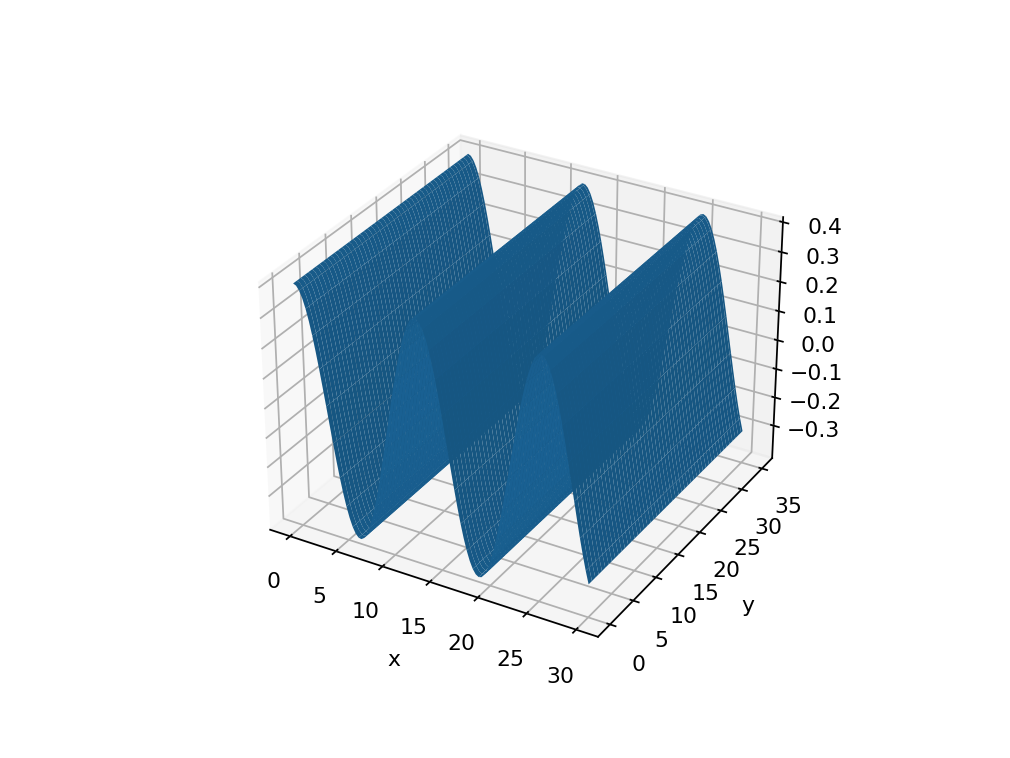

11.309932474020213


In [4]:
amp = 0.4
k = .5
Zgrid = amp*np.cos(Xgrid*k)
# Zgrid = amp*(np.cos(Xgrid*k) + np.cos(Ygrid*k))
fig,ax = plt.subplots(subplot_kw = dict(projection='3d'))
ax.plot_surface(Xgrid,Ygrid,Zgrid)
ax.set_xlabel('x')
ax.set_ylabel('y')
predicted_angle = np.arctan(amp*k)*180/np.pi
print(predicted_angle)

In [5]:
dZdx = np.diff(Zgrid,axis=1)/dx; print(dZdx[0:5,0:5])
dZdy = np.diff(Zgrid,axis=0)/dy; print(dZdy[0:5,0:5])

print(np.shape(dZdx))
print(np.shape(dZdy))
print(np.shape(Xgrid))
Xgridnew = Xgrid[1:,1:]
Ygridnew = Ygrid[1:,1:]

[[-0.01512255 -0.04502115 -0.07388818 -0.10106222 -0.12592062]
 [-0.01512255 -0.04502115 -0.07388818 -0.10106222 -0.12592062]
 [-0.01512255 -0.04502115 -0.07388818 -0.10106222 -0.12592062]
 [-0.01512255 -0.04502115 -0.07388818 -0.10106222 -0.12592062]
 [-0.01512255 -0.04502115 -0.07388818 -0.10106222 -0.12592062]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
(100, 99)
(99, 100)
(100, 100)


(99, 99)


<IPython.core.display.Javascript object>


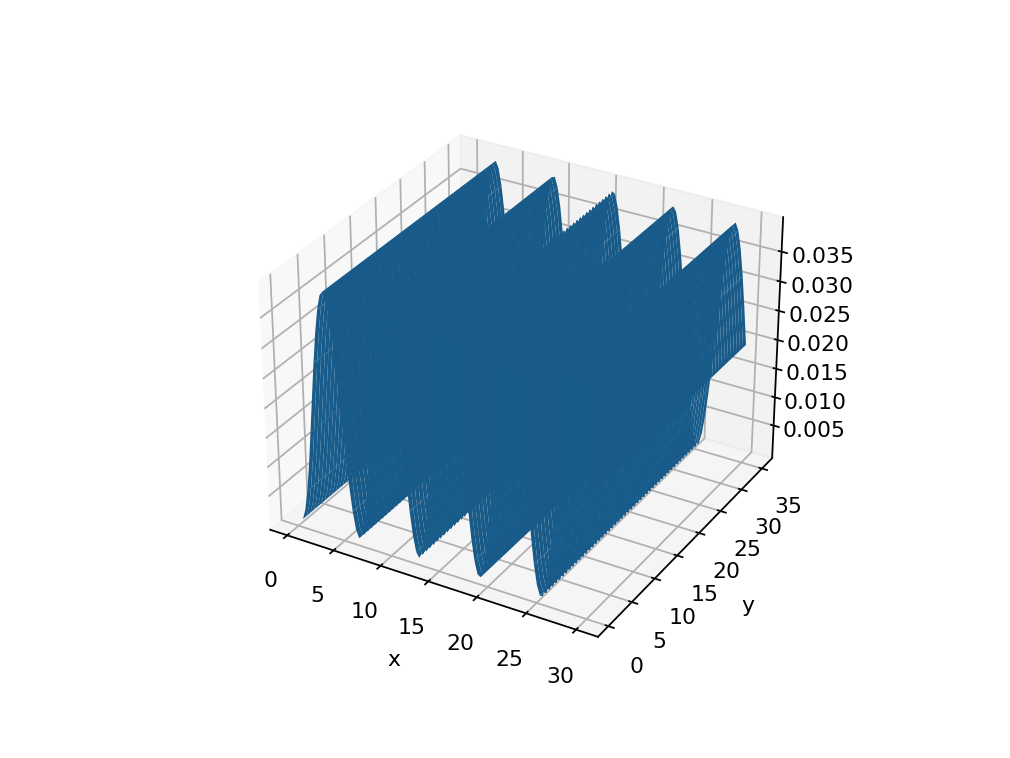

Text(0.5, 0.5, 'y')

In [6]:
Z2 = dZdx[1:,:]**2+dZdy[:,1:]**2
print(np.shape(Z2))
fig,ax = plt.subplots(subplot_kw = dict(projection='3d'))
ax.plot_surface(Xgridnew,Ygridnew,Z2)
ax.set_xlabel('x')
ax.set_ylabel('y')

<IPython.core.display.Javascript object>


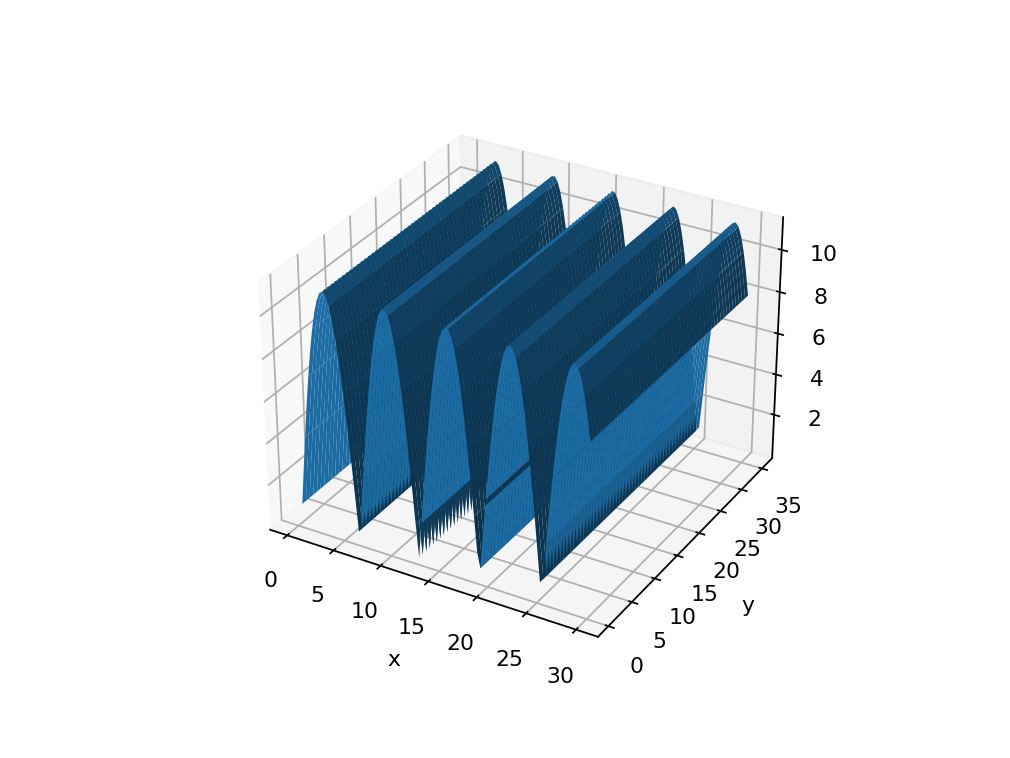

Text(0.5, 0.5, 'y')

In [7]:
anglegrid = np.arctan(Z2**.5)*180/np.pi
fig,ax = plt.subplots(subplot_kw = dict(projection='3d'))
ax.plot_surface(Xgridnew,Ygridnew,anglegrid)
ax.set_xlabel('x')
ax.set_ylabel('y')

[2079  990  792  792  792  891 1089 2376]
[8.79459572e-07 4.99063740e-03 9.98039534e-03 1.49701533e-02
 1.99599112e-02 2.49496692e-02 2.99394271e-02 3.49291850e-02
 3.99189430e-02]


<IPython.core.display.Javascript object>


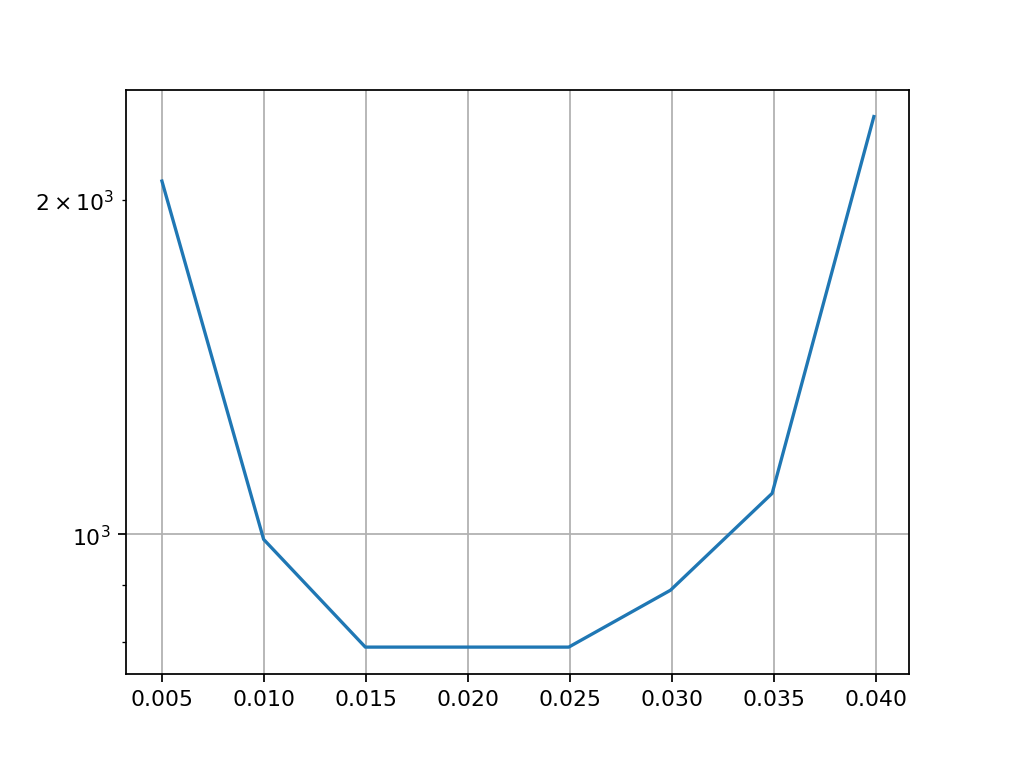

<IPython.core.display.Javascript object>


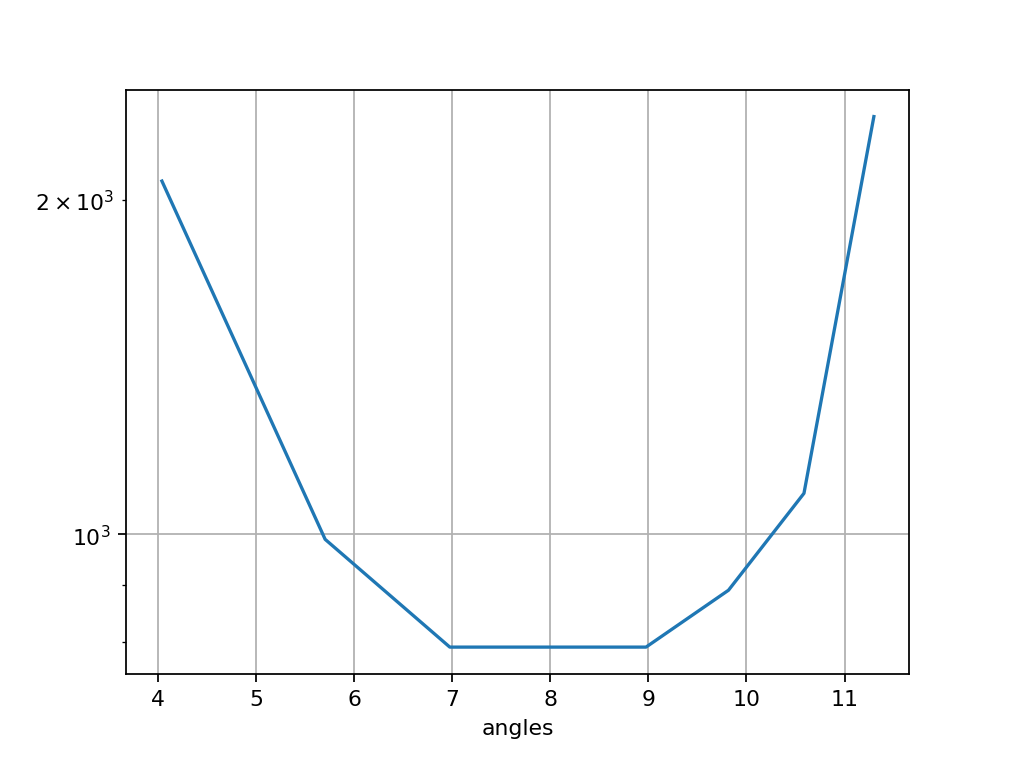

0.03991894298863575


In [8]:
counts,bins = np.histogram(Z2,bins=8)
print(counts)
print(bins)
plt.figure()
plt.semilogy(bins[1:],counts)
plt.grid(True)


thetabins = np.arctan(bins**.5)*180/np.pi
plt.figure()
plt.semilogy(thetabins[1:],counts)
plt.xlabel('angles')
plt.grid(True)
print(np.max(Z2))